<a href="https://colab.research.google.com/github/ChristianLieven/memote-tutorial/blob/master/Memote_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Memote: A community-driven effort towards a standardized genome-scale metabolic model test suite
Tutorial for the Summer Workshop for the Center for Reproducible Biomedical Modeling 
<br>
2019/08/07

In [0]:
from IPython.display import Image

# Introduction

## Reconstruction
Build a genome-scale metabolic model 

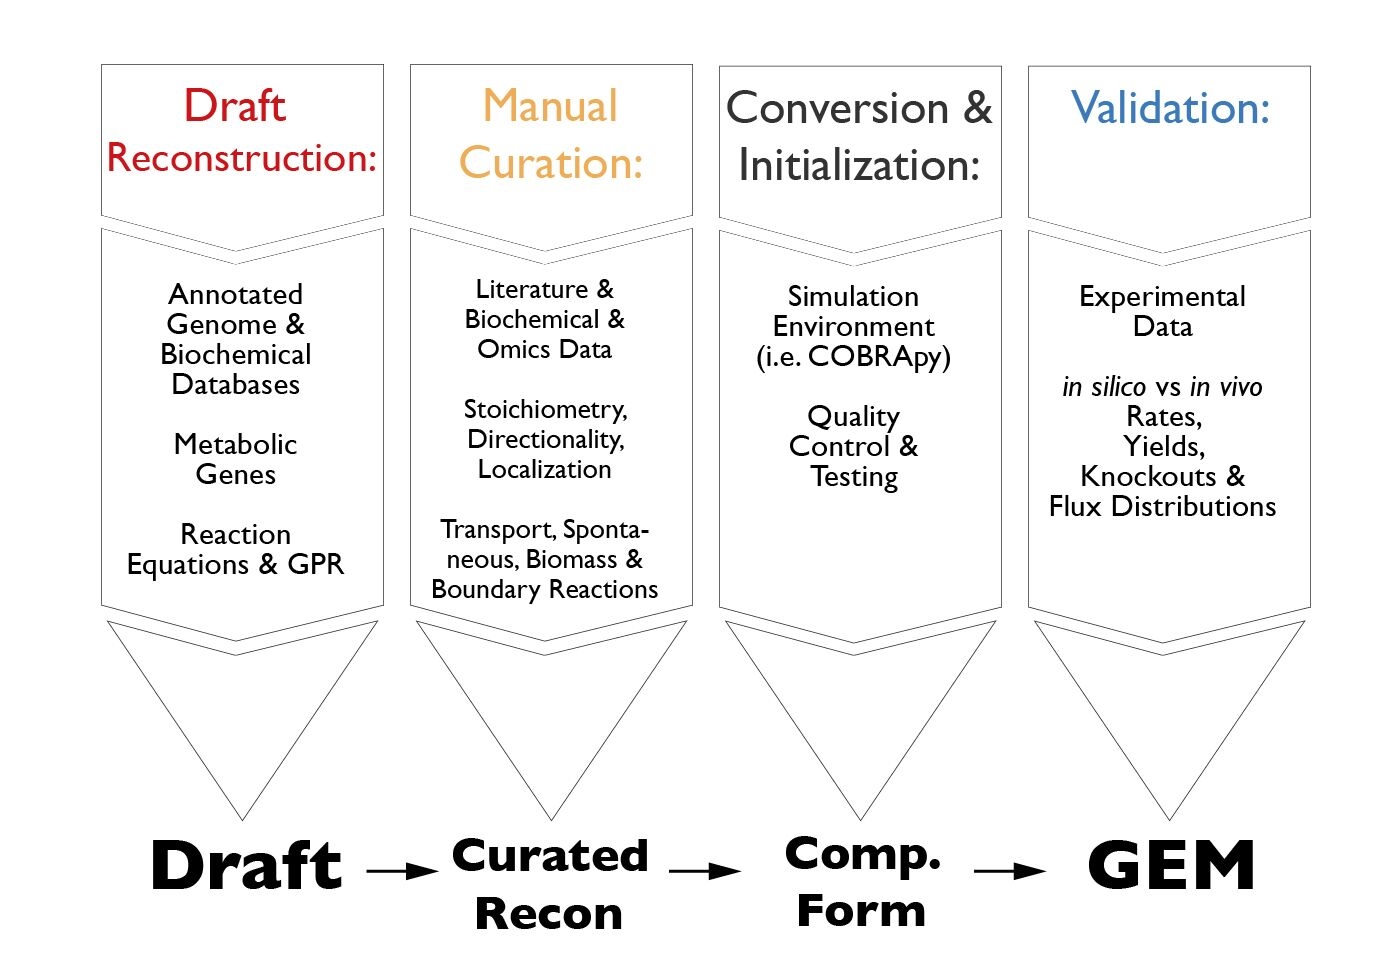

In [0]:
Image("slides/reconstruction.jpeg", width=600)

For details on the ~96 reconstruction steps see [Thiele, I., and Palsson, B. Ø. (2010). A protocol for generating a high-quality genome-scale metabolic reconstruction. Nat. Protoc. 5, 93–121. doi:10.1038/nprot.2009.203](https://www.nature.com/articles/nprot.2009.203).

-----------------

## Complex Construct

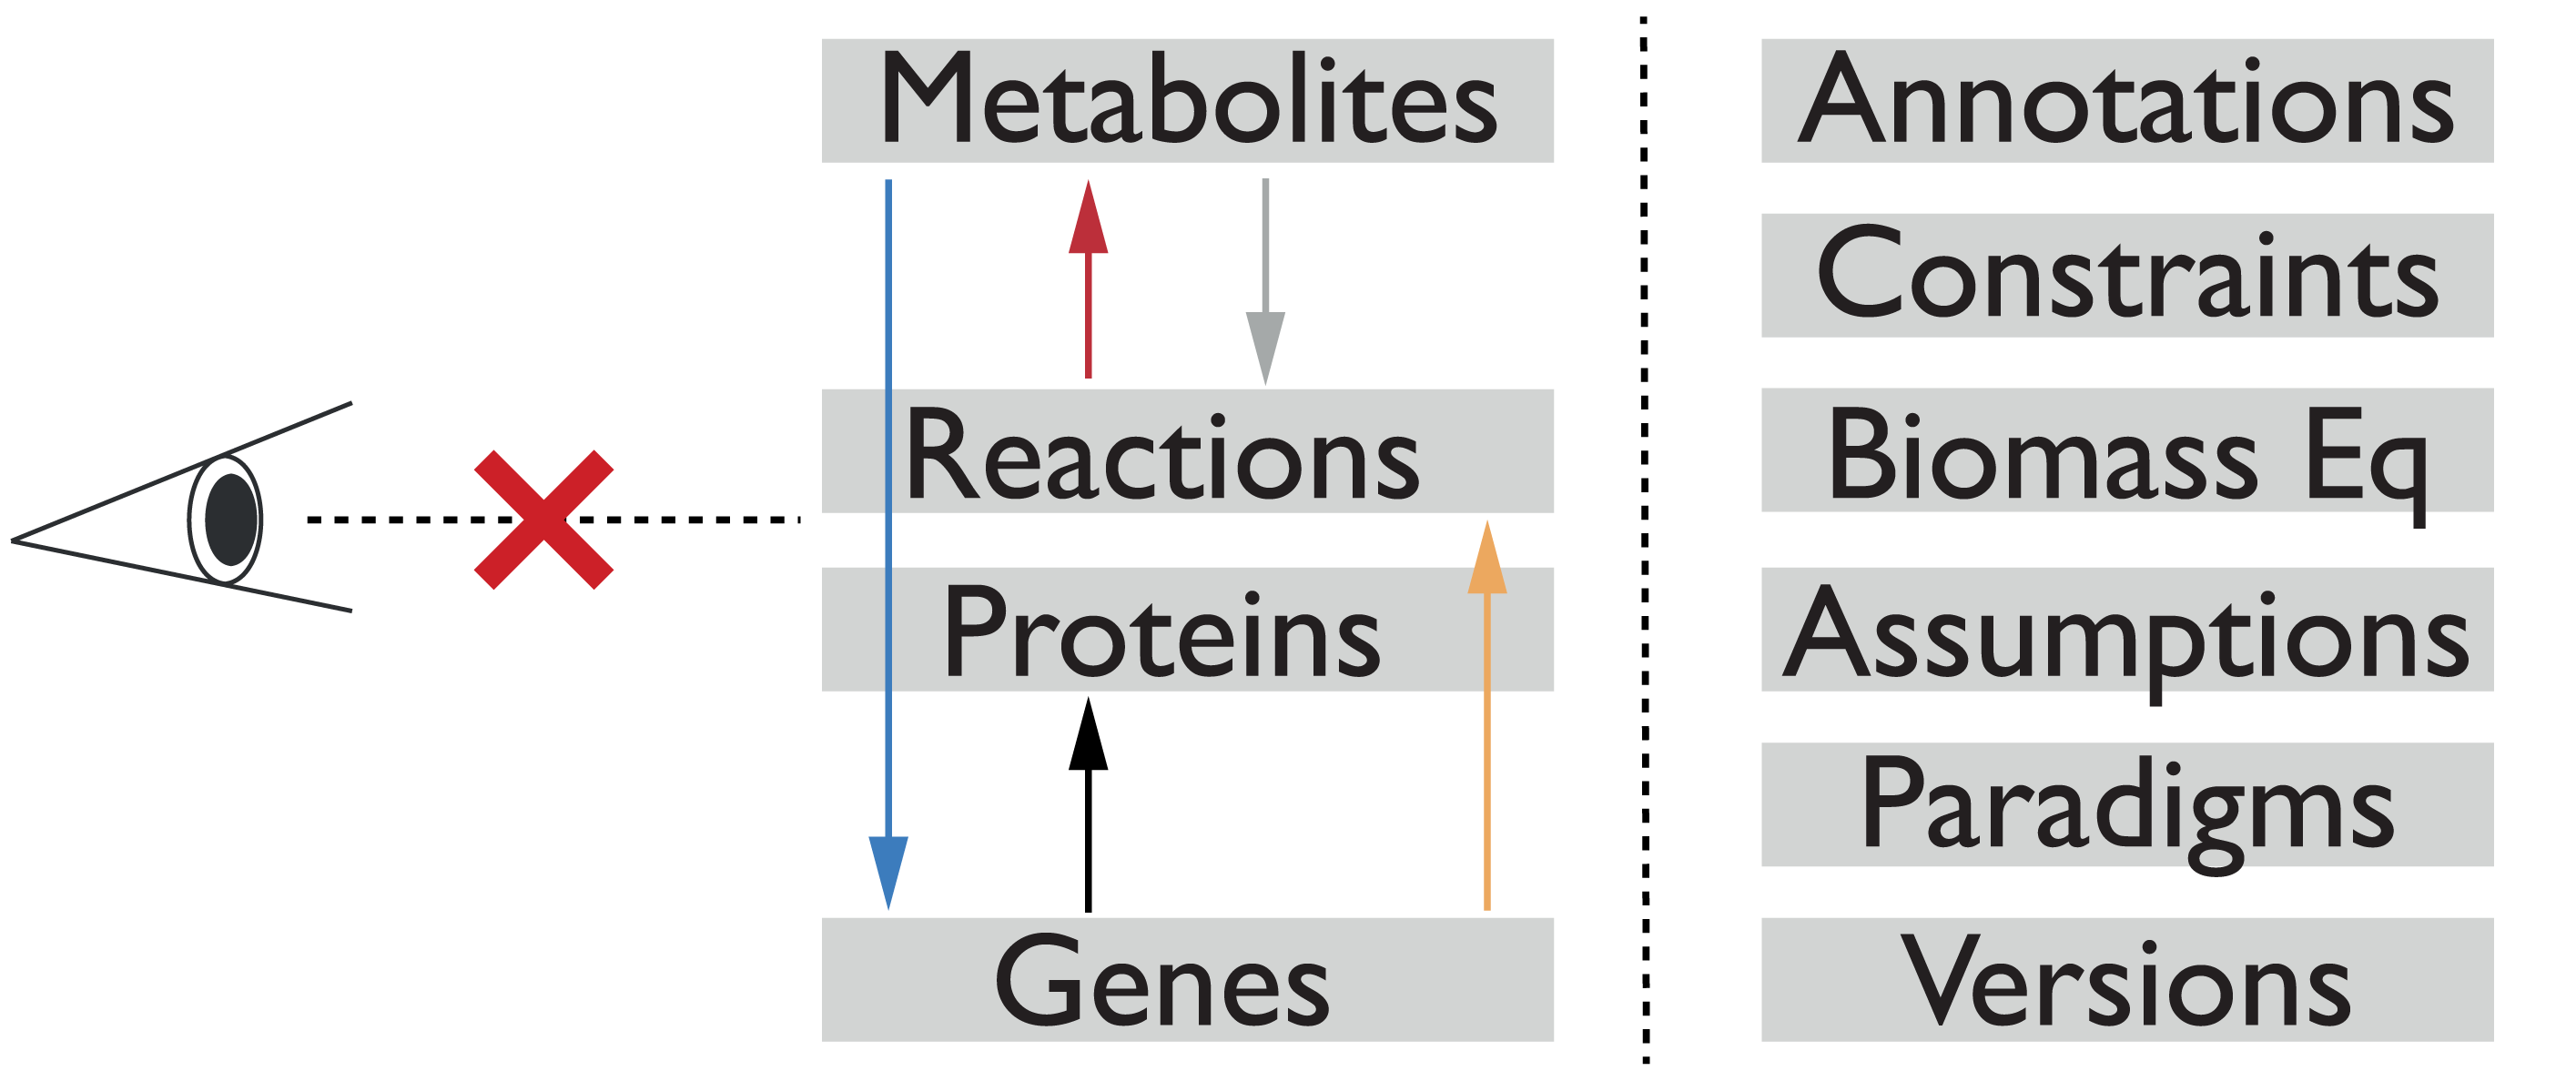

In [0]:
Image("slides/complex_construct.png", width=600)

-----------

## Multi-step, Iterative Process

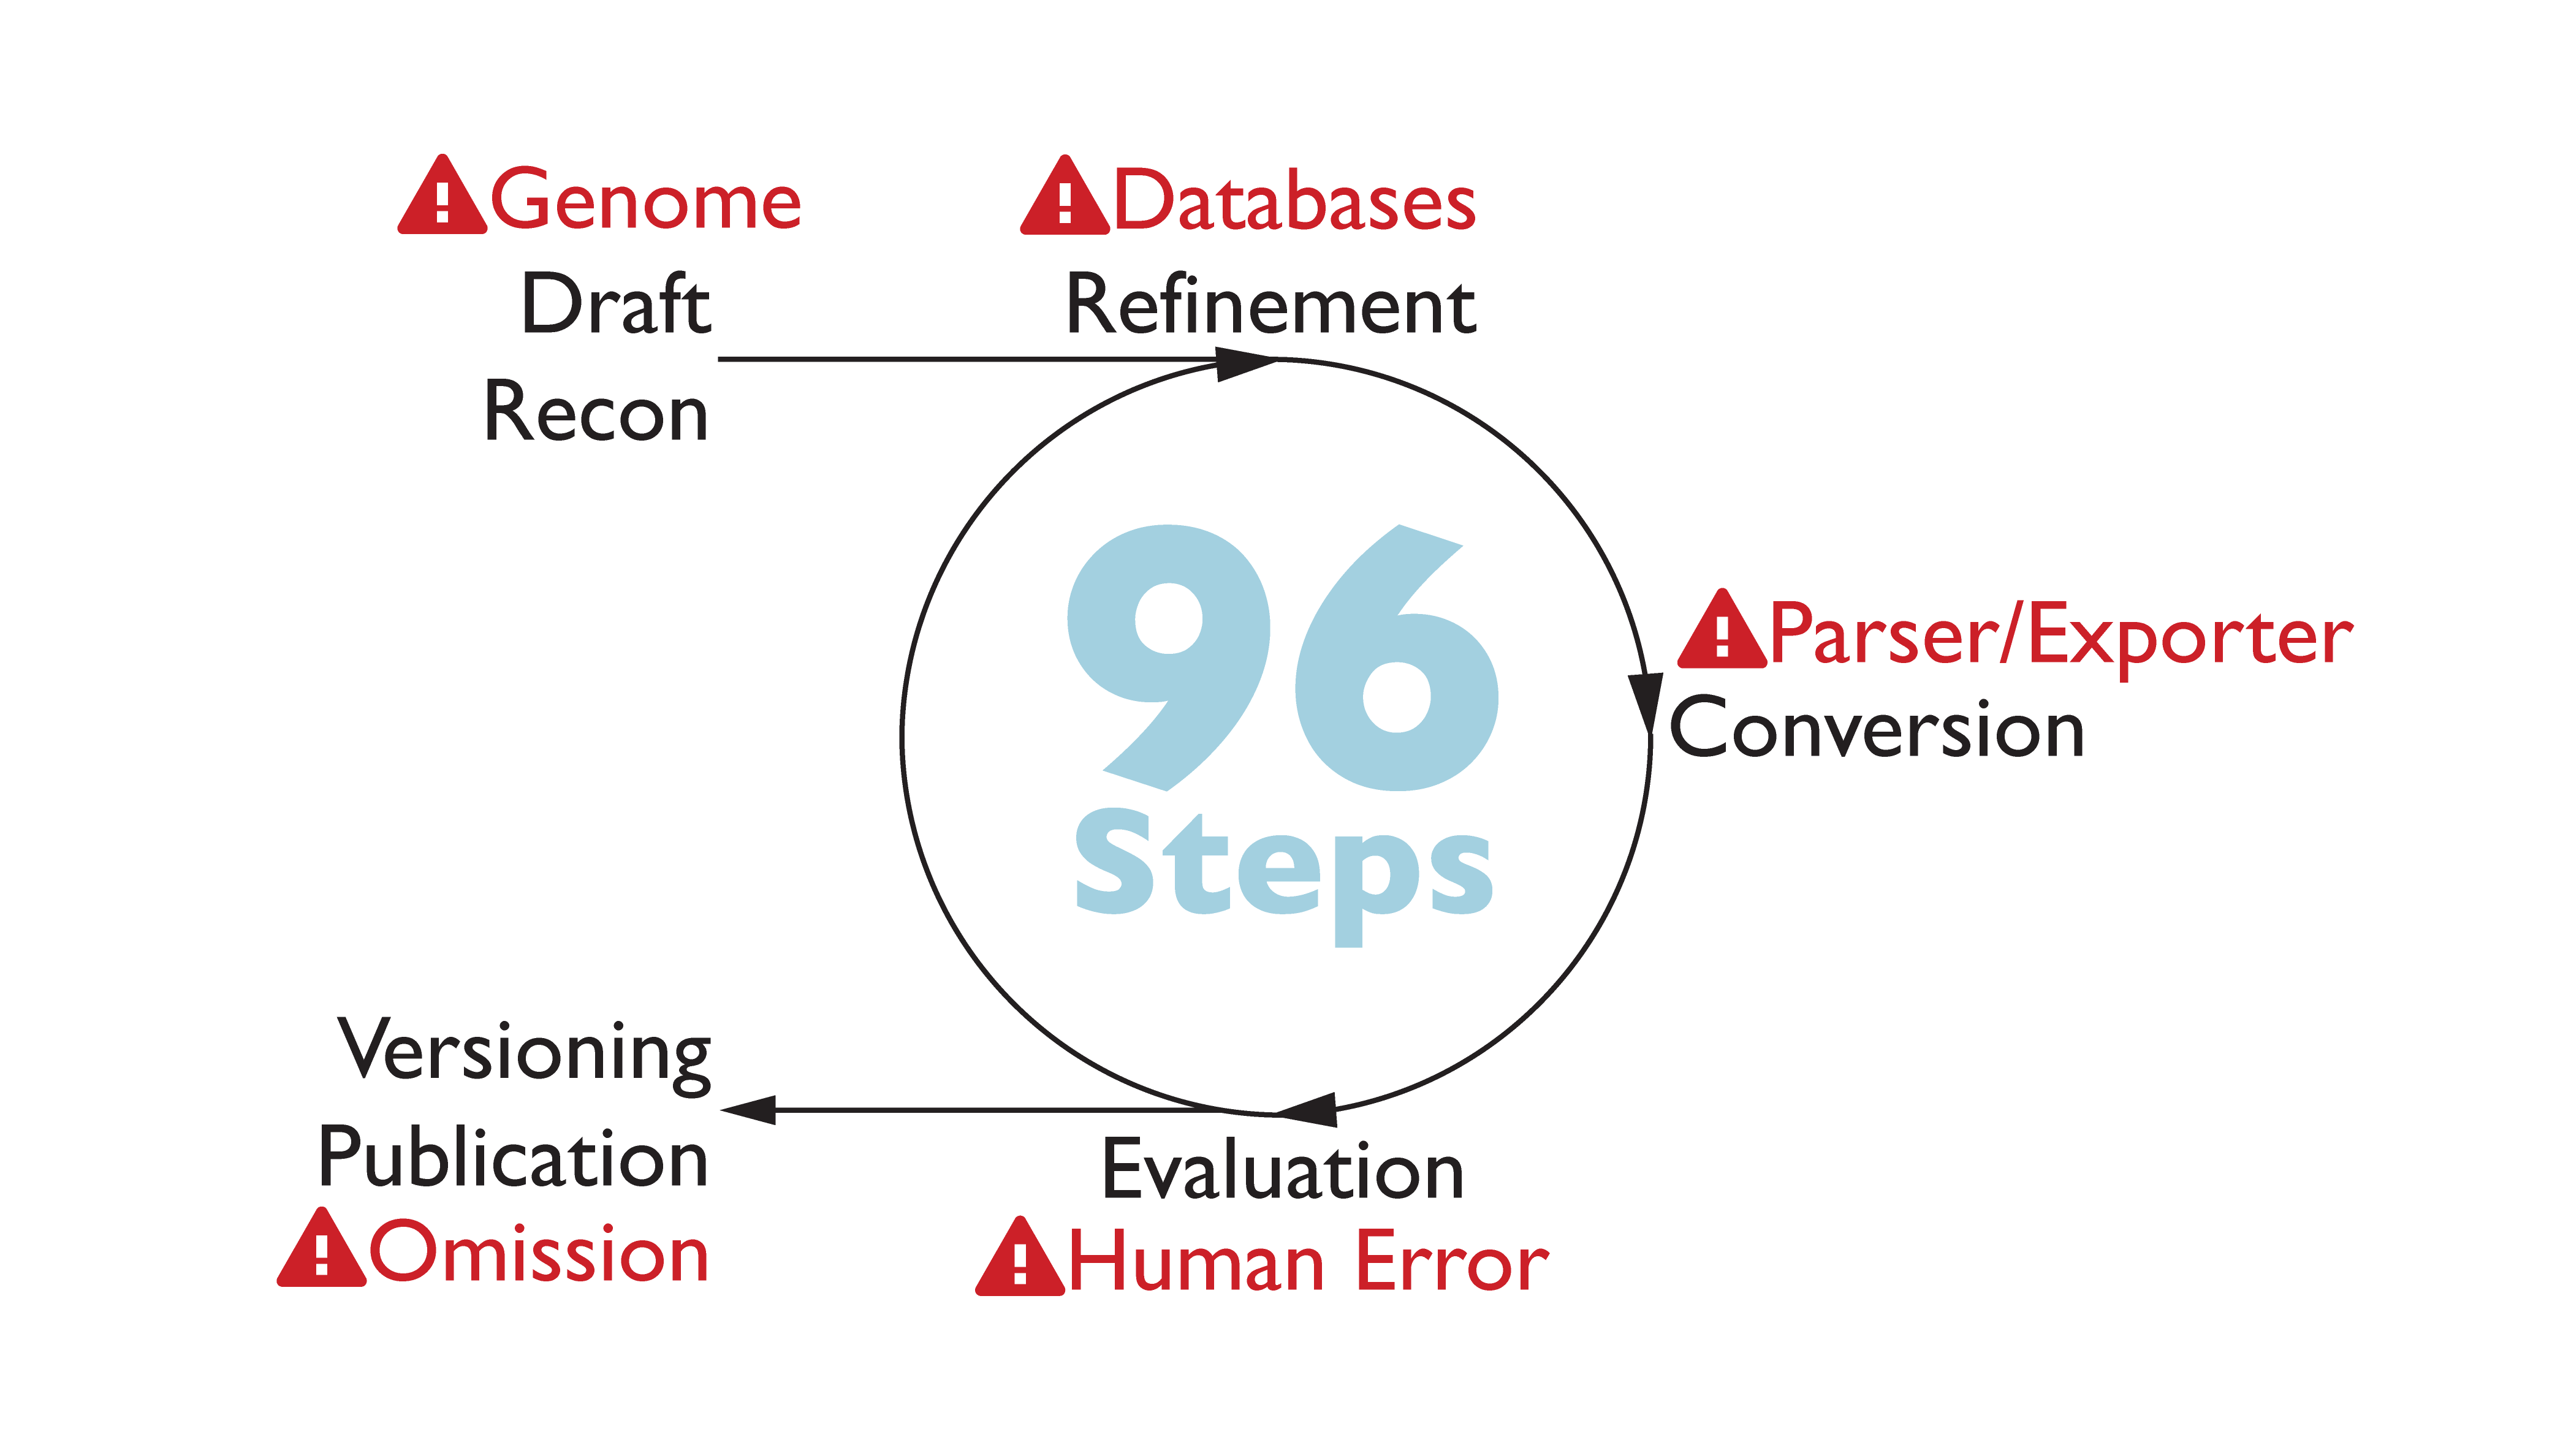

In [0]:
Image("slides/complex_creation.png", width=600)

------------

## Goals
<br>
<div>
<li style="font-size: x-large; margin:30px"> Singular quantitative score </li>
<li style="font-size: x-large; margin:30px"> Reflect quality indicators from SOPs </li>
<li style="font-size: x-large; margin:30px"> Minimize manual burden of QC </li> 
</div>

---------

## Test-driven development 

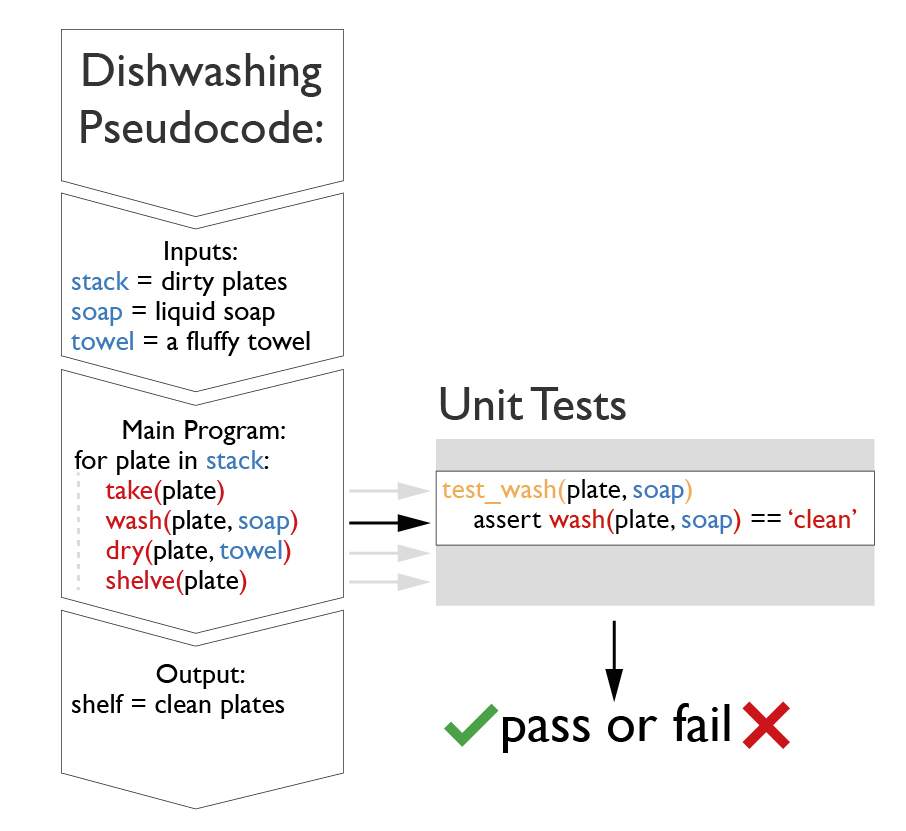

In [0]:
Image("slides/dishwashing.jpg", width=600)

---------

## Memote Test Categories

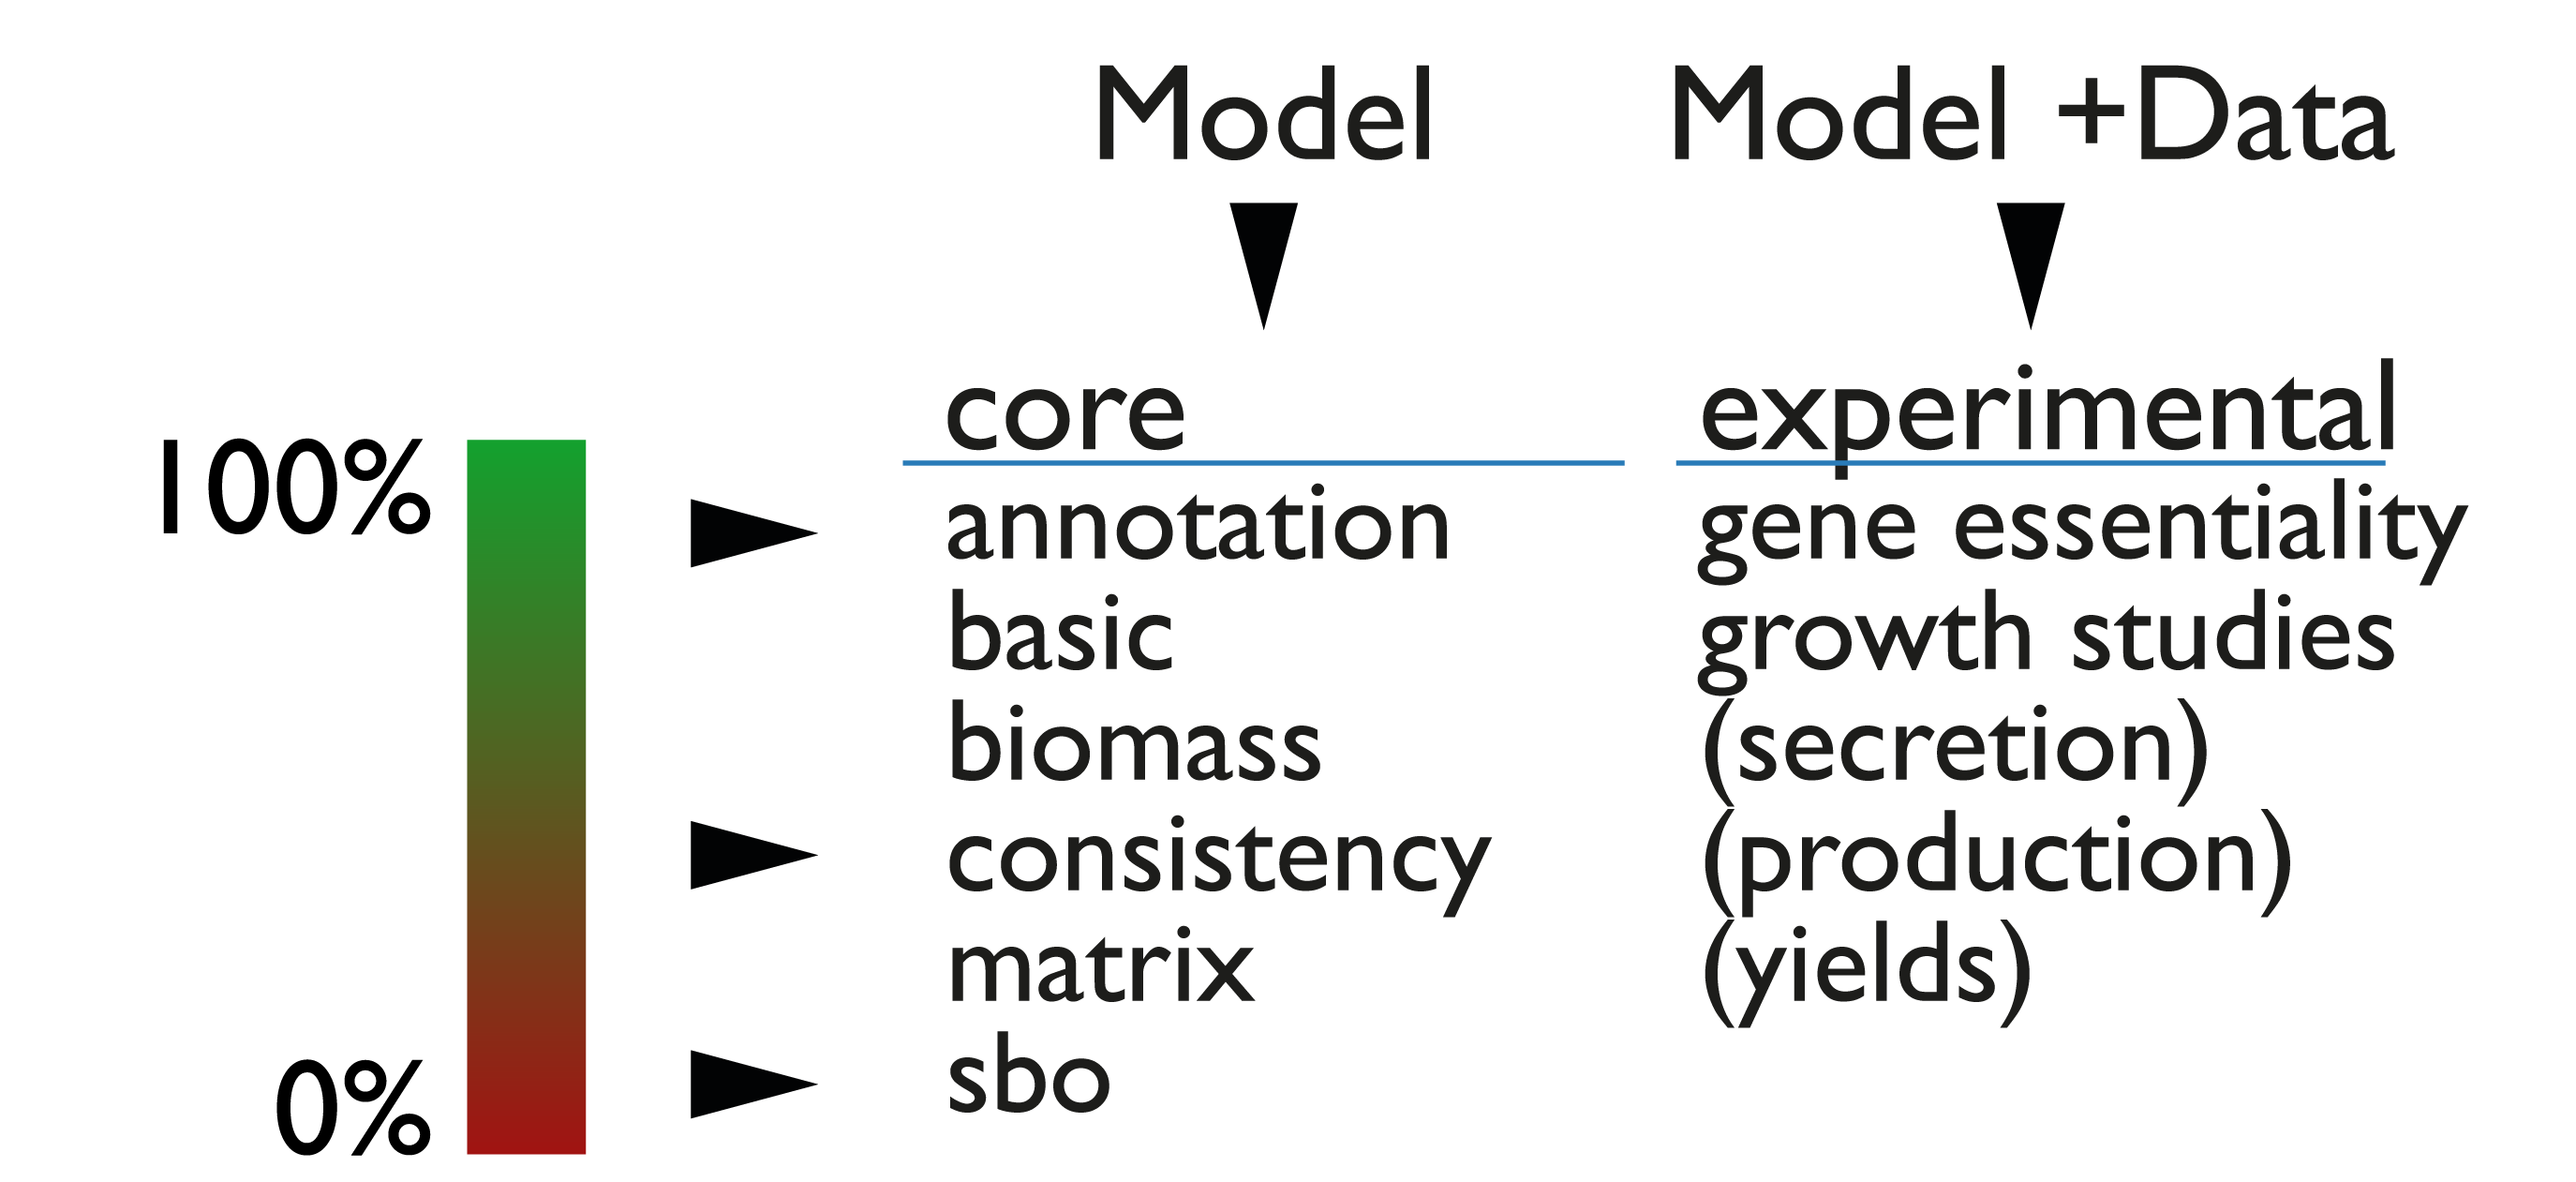

In [0]:
Image("slides/categories.png", width=600)

-----------------

## Memote Principal Workflows

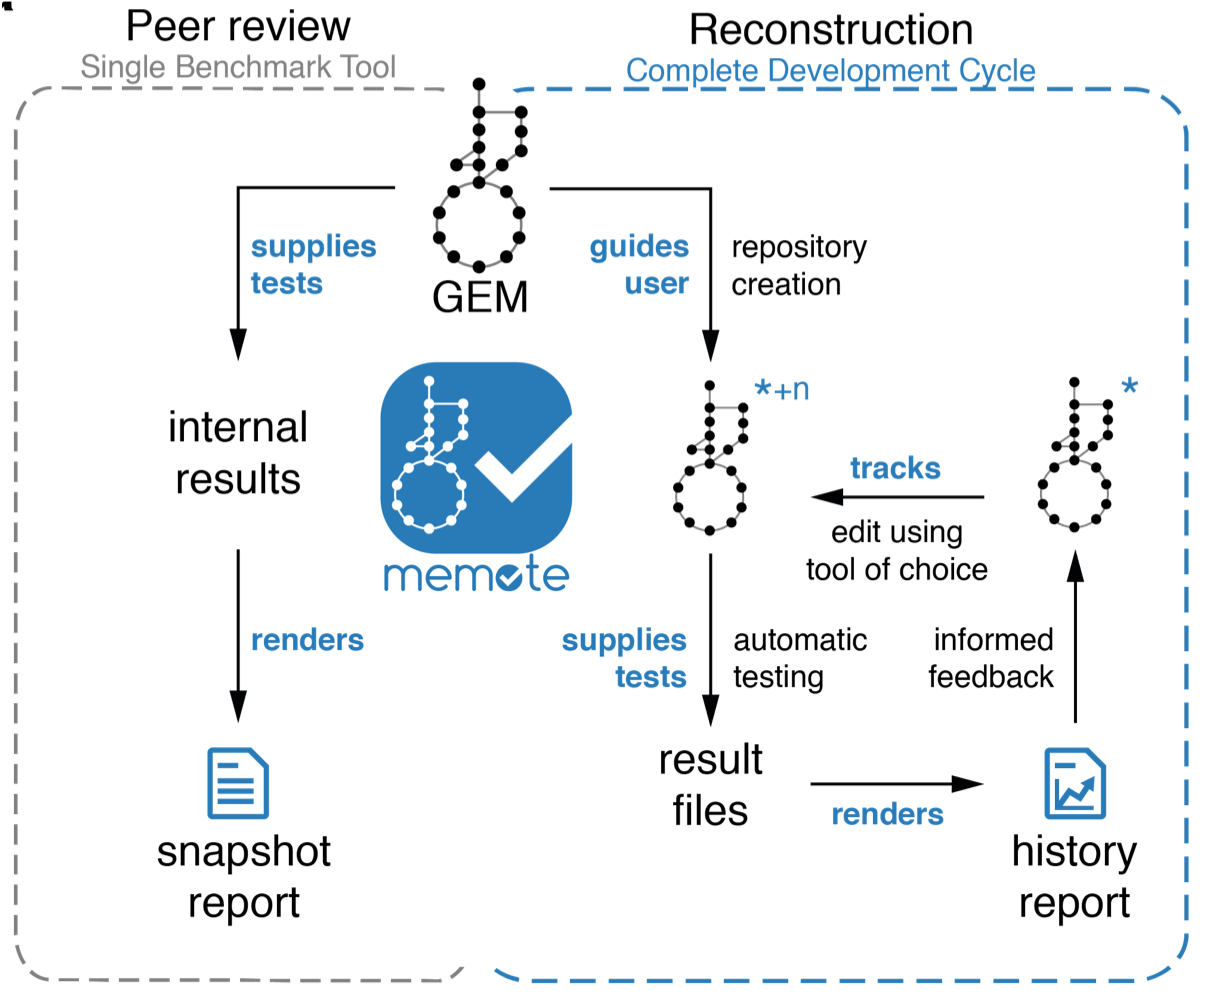

In [0]:
Image("slides/workflows.png", width=600)

# Installation

The preferred method to install memote is to use `pip` from the terminal:

`pip install memote`

This gives you the most recent release of `memote`. 

<br>
Please note: 
<br>
1. memote requires `git` (https://git-scm.com/), which may not be installed on your local system.<br>
2. We recommend installing `memote` in a virtual environment to avoid dependency conflicts.

Colaboratory machines have git preinstalled and are instanced which is why we won't show these steps here.

In [0]:
# Here we install a specific branch which fixes 

%%capture
!pip install -U https://github.com/opencobra/memote/archive/register_marks.zip

For this tutorial we will be working with the `E. coli` core metabolism model hosted at http://bigg.ucsd.edu/static/models/e_coli_core.xml

Let's retrieve it quickly using [`wget`](https://www.gnu.org/software/wget/).

In [0]:
!wget http://bigg.ucsd.edu/static/models/e_coli_core.xml

--2019-08-06 08:13:22--  http://bigg.ucsd.edu/static/models/e_coli_core.xml
Resolving bigg.ucsd.edu (bigg.ucsd.edu)... 169.228.33.117
Connecting to bigg.ucsd.edu (bigg.ucsd.edu)|169.228.33.117|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 494228 (483K) [application/xml]
Saving to: ‘e_coli_core.xml’

e_coli_core.xml     100%[===================>] 482.64K  1.49MB/s    in 0.3s    

2019-08-06 08:13:27 (1.49 MB/s) - ‘e_coli_core.xml’ saved [494228/494228]



`Memote` is a command line tool. A python API exists but is primarily used for testing and debugging. For a detailed description of the API commands please consult the documentation here: https://memote.readthedocs.io/en/latest/autoapi/memote/suite/api/index.html

# Peer-Review
Generating Snapshot and Diff reports

## Snapshot report

In [0]:
!memote report snapshot e_coli_core.xml

============================= test session starts ==============================
platform linux -- Python 3.6.8, pytest-5.0.1, py-1.8.0, pluggy-0.12.0
rootdir: /usr/local, inifile: setup.cfg
collected 145 items                                                            

../usr/local/lib/python3.6/dist-packages/memote/suite/tests/test_annotation.py . [  0%]
.FFF.FF.FF..FFFFF.FFFFFFFFFFFFFFF..FF..F...F.F..F.F.F..F..FFF...         [ 44%]
../usr/local/lib/python3.6/dist-packages/memote/suite/tests/test_basic.py . [ 45%]
.....F.F..........F.FF                                                   [ 60%]
../usr/local/lib/python3.6/dist-packages/memote/suite/tests/test_biomass.py . [ 61%]
F..FF.F.F                                                                [ 67%]
../usr/local/lib/python3.6/dist-packages/memote/suite/tests/test_consistency.py . [ 68%]
ssssssssssssssss...F.F.FF.                                               [ 86%]
../usr/local/lib/python3.6/dist-packages/memote/suite/tests/tes

The basic invocation above can be modified by specifying a few extra options:

1. More verbose output in the terminal:
<br>`!memote report snapshot -a "--tb=long" e_coli_core.xml`
<br>More options can be found here https://docs.pytest.org/en/latest/usage.html

2. Provide path and name for the generated report:
<br>`!memote report snapshot --filename "e_coli_snap_report.html" e_coli_core.xml`

3. Exclusively run, or skip individual tests or test modules. For instance, exclusively test for or skip essentiality, respectively:
<br> `memote report snapshot --exclusive "test_annotation" e_coli_core.xml`
<br> `memote report snapshot --skip "test_annotation" e_coli_core.xml`

4. Set the solver to be used. Available options are: "cplex", "glpk", "gurobi", "glpk_exact".
<br> `memote report snapshot --solver "glpk" e_coli_core.xml`
<br>[GLPK](https://www.gnu.org/software/glpk/) is the default as the other solvers require licenses

In [0]:
from IPython.display import HTML

In [0]:
HTML("index.html")

## Diff report

To showcase how the Diff report looks like, we're going to compare the `E. coli` core model with the Human Erythrocyte model (http://bigg.ucsd.edu/static/models/iAB_RBC_283.xml).

In [0]:
!wget http://bigg.ucsd.edu/static/models/iAB_RBC_283.xml

--2019-08-06 08:17:54--  http://bigg.ucsd.edu/static/models/iAB_RBC_283.xml
Resolving bigg.ucsd.edu (bigg.ucsd.edu)... 169.228.33.117
Connecting to bigg.ucsd.edu (bigg.ucsd.edu)|169.228.33.117|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1743250 (1.7M) [application/xml]
Saving to: ‘iAB_RBC_283.xml’

iAB_RBC_283.xml     100%[===================>]   1.66M  4.27MB/s    in 0.4s    

2019-08-06 08:17:55 (4.27 MB/s) - ‘iAB_RBC_283.xml’ saved [1743250/1743250]



In [0]:
%%capture
!memote report diff "e_coli_core.xml" "iAB_RBC_283.xml"

In [0]:
HTML("index.html")